In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from geopy.distance import geodesic 

In [4]:
df = pd.read_csv("~/Documents/data/strava/output2.csv")

In [ ]:
def point_distance(x):
    return geodesic(kolkata, delhi).km

In [10]:
df.columns
df['timestamp2'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp2', inplace=True)
df['time_delta'] = df.index.to_series().diff().apply(lambda x: x.seconds)
df['distance_delta'] = 
df.head()

,timestamp,latitude,longitude,elevation,heart_rate,time_delta
timestamp2,,,,,,
2020-06-20 12:34:21+00:00,2020-06-20T12:34:21Z,51.454672,-0.217561,35.3,116,NaN
2020-06-20 12:34:22+00:00,2020-06-20T12:34:22Z,51.454661,-0.217564,35.4,116,1.0
2020-06-20 12:34:23+00:00,2020-06-20T12:34:23Z,51.454647,-0.217579,35.4,116,1.0
2020-06-20 12:34:24+00:00,2020-06-20T12:34:24Z,51.454644,-0.217590,35.4,116,1.0
2020-06-20 12:34:25+00:00,2020-06-20T12:34:25Z,51.454605,-0.217623,35.5,115,1.0


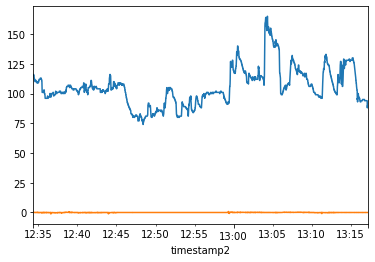

In [11]:
df['heart_rate'].plot()
df['elevation'].diff(2).plot()

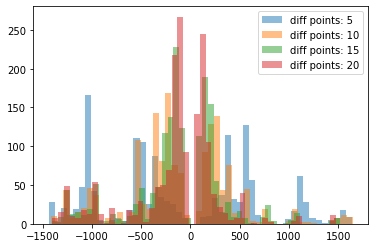

In [7]:
plt.clf()
start = 5
steps = 5
delta = 5
for i in range(start, start*steps, delta):
    subdf = (df['heart_rate'] / df['elevation'].diff(i)).replace([np.inf, -np.inf], np.nan).dropna() # .hist(alpha=0.5)
    # print(subdf.describe())
    plt.hist(subdf, bins=50, alpha=0.5, label=f"diff points: {i}")
plt.legend()

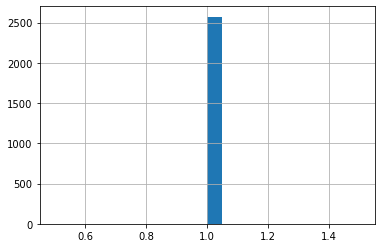

In [8]:
df['time_delta'].hist(bins=20)